# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle
from tabulate import tabulate

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("bank_transactions_data.csv")

df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Menukar data anatara kolom TransactionDate dan PreviousTransactionDate

In [4]:
df[['TransactionDate', 'PreviousTransactionDate']] = df[['PreviousTransactionDate', 'TransactionDate']]


In [5]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2024-11-04 08:08:08,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2023-04-11 16:29:14
1,TX000002,AC00455,376.24,2024-11-04 08:09:35,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2023-06-27 16:44:19
2,TX000003,AC00019,126.29,2024-11-04 08:07:04,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2023-07-10 18:16:08
3,TX000004,AC00070,184.50,2024-11-04 08:09:06,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2023-05-05 16:32:11
4,TX000005,AC00411,13.45,2024-11-04 08:06:39,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2023-10-16 17:51:24
5,TX000006,AC00393,92.15,2024-11-04 08:06:36,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2023-04-03 17:15:01
6,TX000007,AC00199,7.08,2024-11-04 08:10:09,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2023-02-15 16:36:48
7,TX000008,AC00069,171.42,2024-11-04 08:10:55,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2023-05-08 17:47:59
8,TX000009,AC00135,106.23,2024-11-04 08:11:14,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2023-03-21 16:59:46
9,TX000010,AC00385,815.96,2024-11-04 08:06:32,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2023-03-31 16:06:57


In [6]:
print(f"Jumlah Baris : {df.shape[0]}")
print(f"Jumlah Kolom : {df.shape[1]}")

Jumlah Baris : 2512
Jumlah Kolom : 16


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [8]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [9]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [10]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TransactionID[object],1. TX0024962. TX0024953. TX0024944. TX0024935. TX0024926. TX0024917. TX0024908. TX0024899. TX00248810. TX00248711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)2,502 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,AccountID[object],1. AC004602. AC002023. AC003624. AC003635. AC004806. AC004567. AC002578. AC002259. AC0030410. AC0021911. other,"12 (0.5%)12 (0.5%)12 (0.5%)12 (0.5%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)10 (0.4%)2,399 (95.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cwWoTUQCG0ZsSit1MCIE8TB6iD+tD5G1CyCxs6SYujCtNFaxfMJ6zEtzM4mMyXu7v4nw+Dyg83PoB+H+IjYzYyIiNjNjIiI2M2MiIjYzYyCzGGE9jjHE+n19u/CzcueVms3keY4zFYvFZcPxND9M0radpWo8xHm/9MNw332xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5z/Px8ue3mz4Jd88GgczCf5lFxZuNjHUVGesqMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGW82MgYvZAxeyDj6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrVwMgYvZHyzkfEzSsa6iox1FRnfbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryLgWTsa6iow3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuPNRsa6iox1FRlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzK+2cj4GSVjXUXGuoqMbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWRcCydjXUXGm42MwQsZgxcyjj7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLZyMwQuZ7282V8L5KG/XfiWXm83m+bJBgD82z/Px2nhqOU3TerfbvaxWq9dbPBz343Q6fdrv9+vD4fA4xvgxtjHGWK1Wr9vt9kv+dNyjp2t/4ZyNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMb1dDbv0g/Pt+1dFynufjfr9fj3euhsDvugyofjqeci2cj3b1WrjBCxn/QCAjNjJiIyM2MmIjIzYyYiMjNjJiI/MVlHUQJ0ddGaUAAAAASUVORK5CYII="">",0(0.0%)
3,TransactionAmount[float64],Mean (sd) : 297.6 (291.9)min < med < max:0.3 < 211.1 < 1919.1IQR (CV) : 332.6 (1.0),"2,455 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZElEQVR4nO3cMW/aQBiH8fcKQQZaAyKCzStbB0aWfoN+2K4dI8HMt0BIVgDhhoCQu5SqUtIAd6H1//T8ZnxmeGR0yPe6siwNqLoP//sLAJeon/uAc65pZg3P9fdlWT55Xgv89maozrlmv9//mqZpz2fxzWbz6Jz7RqwIde6J2kjTtDeZTJ46nc7umoXX63UynU57eZ43zIxQEeTsT7+ZWafT2Q0Ggx8e6zc9rgFeYDMFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCY

In [11]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate             360
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate    2512
dtype: int64

In [12]:
df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID", "PreviousTransactionDate"], inplace=True)

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation']


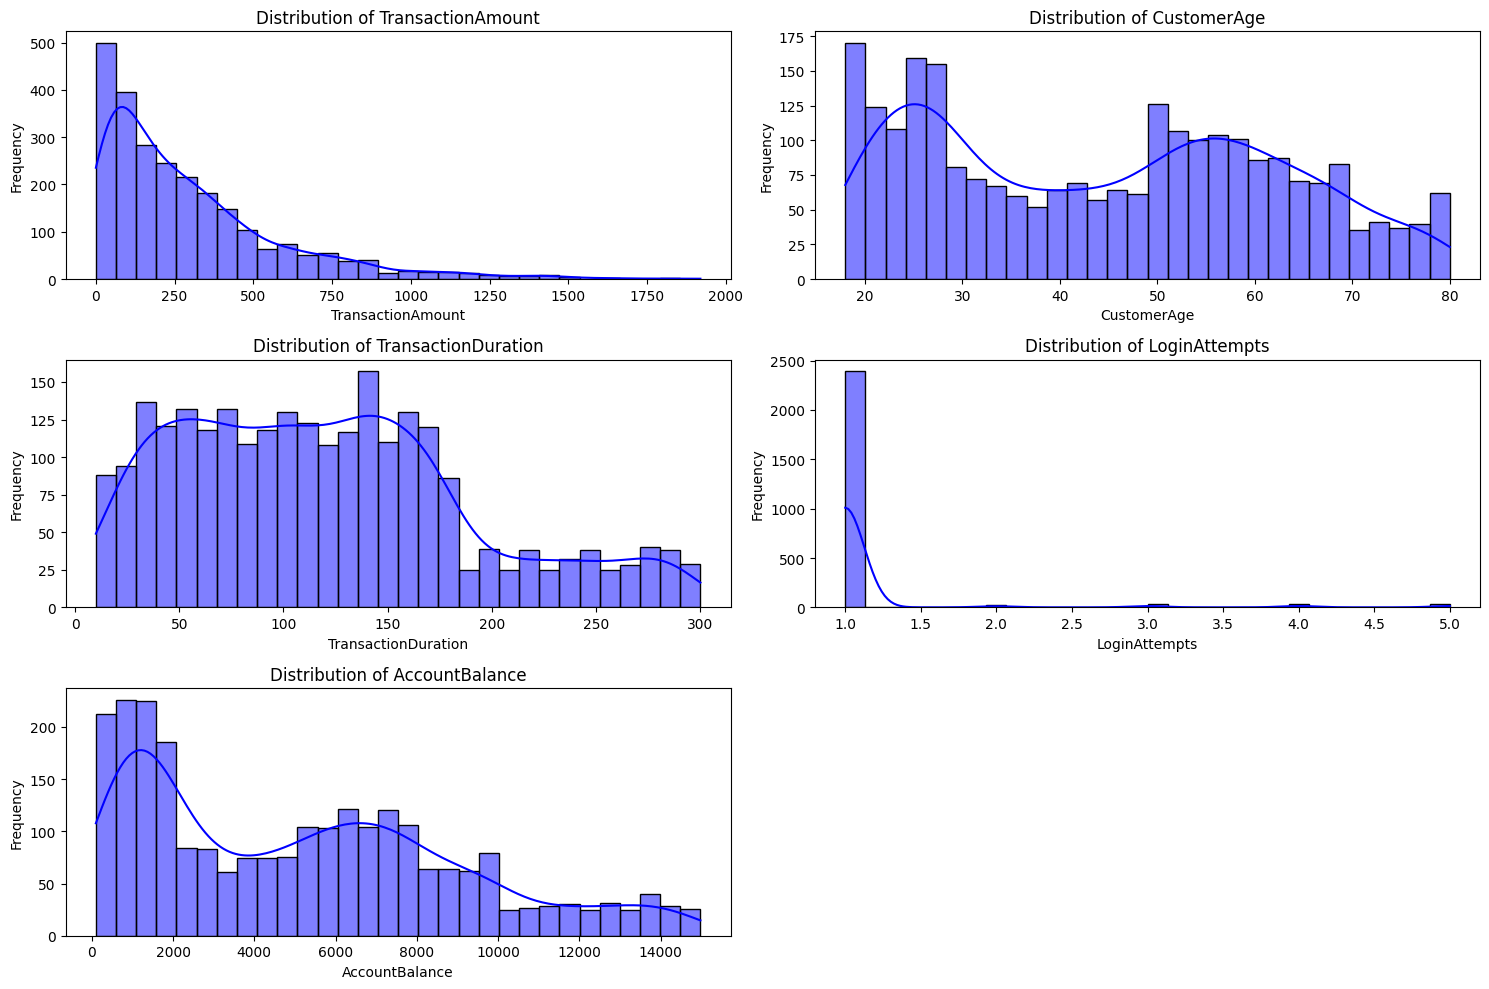

In [14]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

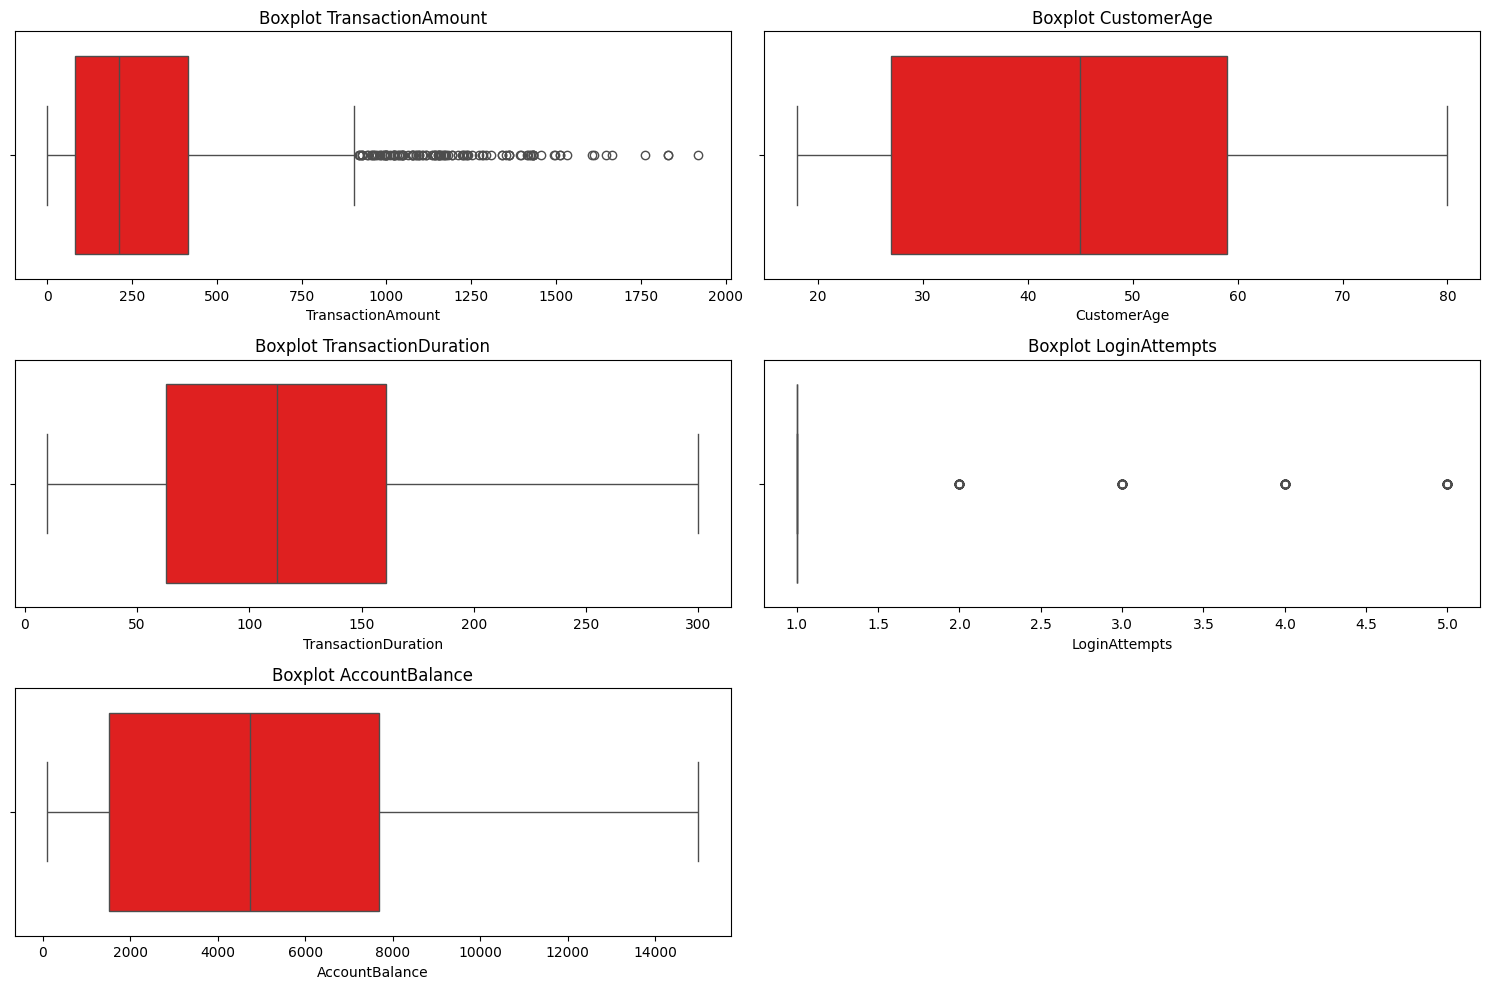

In [15]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)
    sns.boxplot(x=df[col], color='red')
    plt.title(f"Boxplot {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

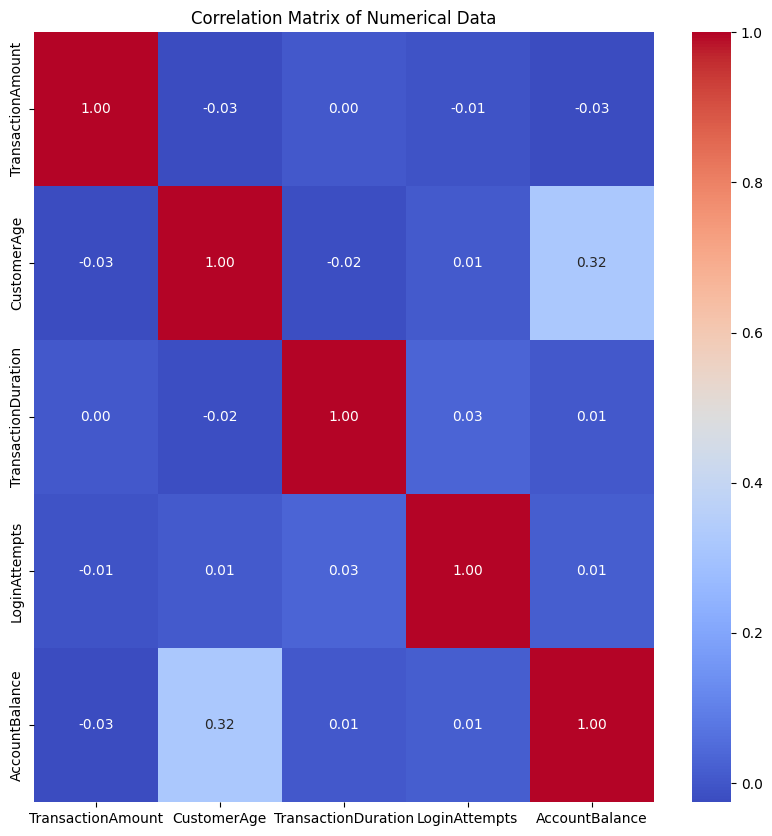

In [16]:
plt.figure(figsize=(10, 10))
correlation_matrix = df[numerical_columns].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Data')
plt.show()


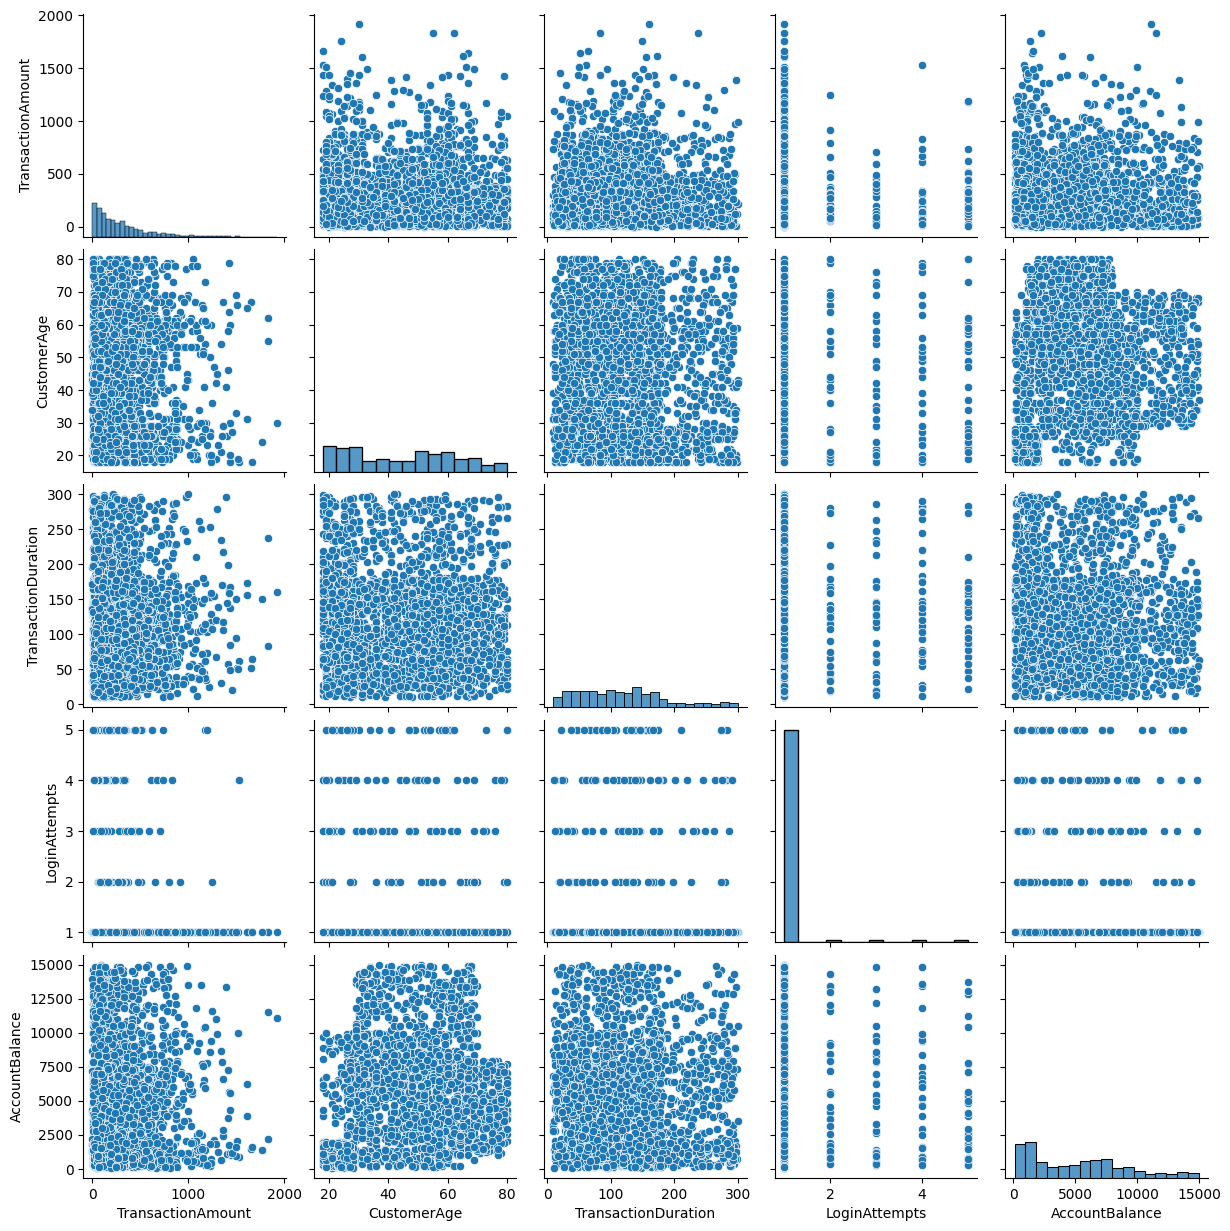

In [17]:
sns.pairplot(df[numerical_columns])
plt.show()

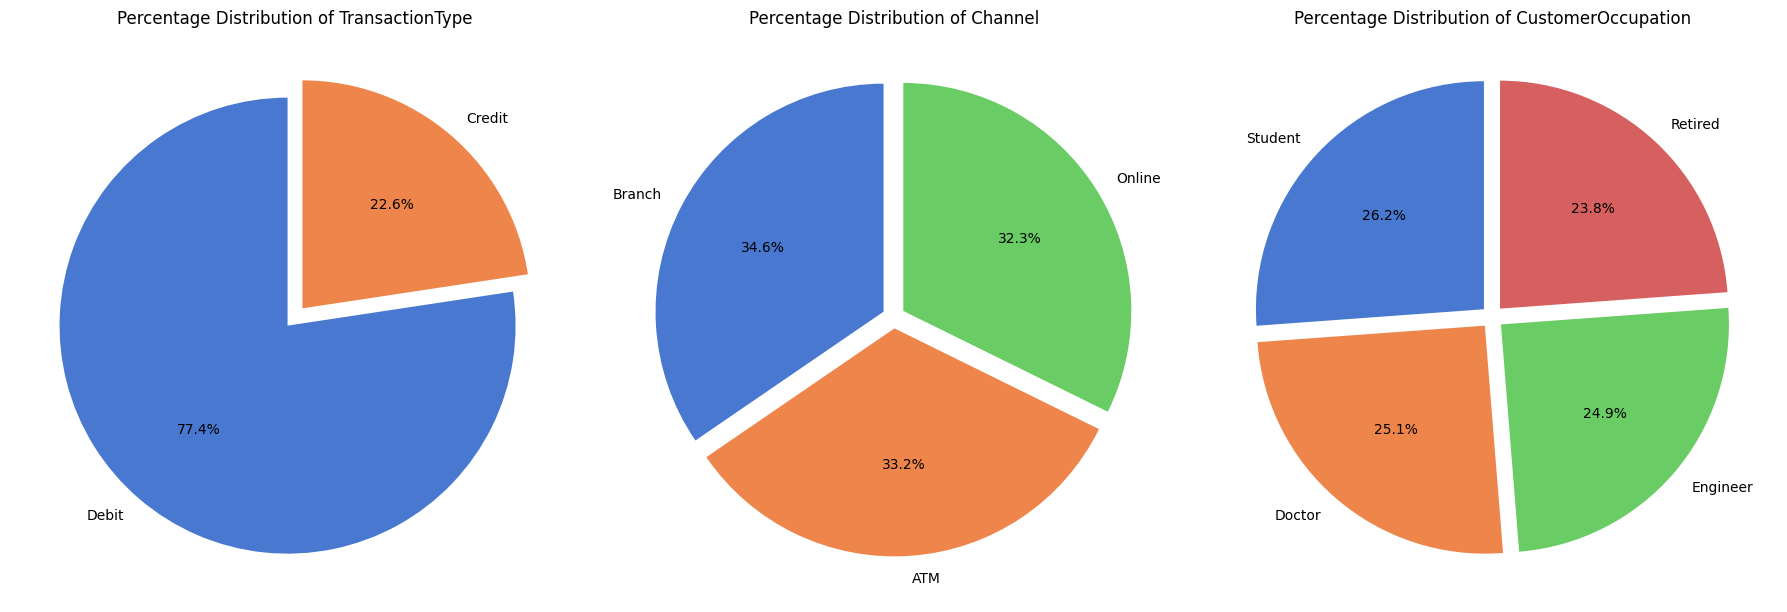

In [18]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))  

    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                               startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()
    
columns_to_plot = ['TransactionType', 'Channel', 'CustomerOccupation']
plot_categorical_distributions(columns_to_plot)

C:\Users\loq\AppData\Local\Temp\ipykernel_7648\3807449509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette=palette)


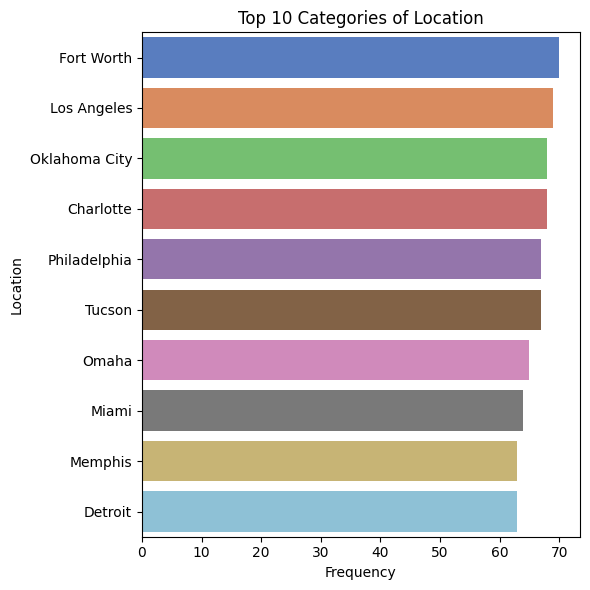

In [19]:
def plot_top_categories_bar_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)  
        
        top_categories = data[column_name].value_counts().nlargest(10)
        
        sns.barplot(x=top_categories.values, y=top_categories.index, palette=palette)
        
        plt.title(f'Top 10 Categories of {column_name}')
        plt.xlabel('Frequency')
        plt.ylabel(column_name)  
    
    plt.tight_layout()
    plt.show()

plot_top_categories_bar_charts(['Location'])


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [20]:
print("Jumlah data kosong :")
df.isnull().sum()

Jumlah data kosong :


TransactionAmount      0
TransactionDate        0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

2. Menghapus Data Duplikat

In [21]:
print(f'Jumlah data duplikat : {df.duplicated().sum()}')

Jumlah data duplikat : 0


4. Deteksi dan Penanganan Outlier

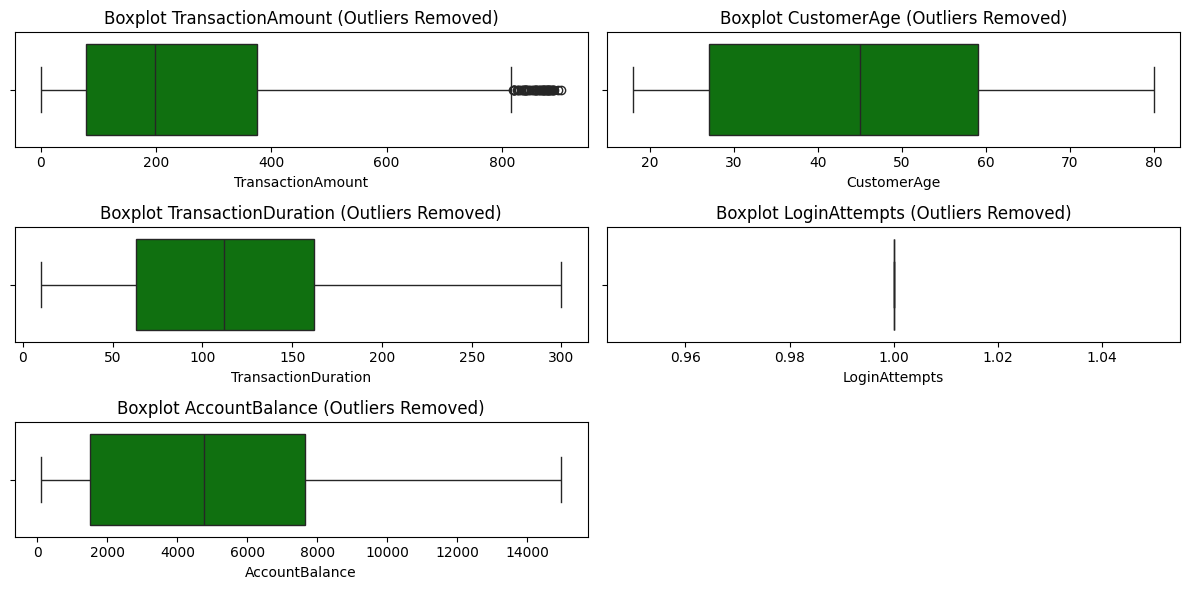

In [22]:
def remove_outliers(df, numerical_columns):
    df_clean = df.copy()  
    
    plt.figure(figsize=(12, 6))
    
    for i, col in enumerate(numerical_columns, 1):
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
        plt.subplot(len(numerical_columns) // 2 + 1, 2, i)  
        sns.boxplot(x=df_clean[col], color='green')
        plt.title(f"Boxplot {col} (Outliers Removed)")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()
    
    return df_clean 


df_cleaned = remove_outliers(df, numerical_columns) 


5. Encoding Data Kategorikal

In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

label_encoders = {col: LabelEncoder() for col in categorical_columns}

print("=== Data Sebelum Encoding ===")
print(df_cleaned[categorical_columns].head(), "\n")

for col in categorical_columns:
    df_cleaned[col + '_Encoded'] = label_encoders[col].fit_transform(df_cleaned[col])

print("=== Data Setelah Encoding ===")
encoded_columns = [col + '_Encoded' for col in categorical_columns]
print(df_cleaned[categorical_columns + encoded_columns].head())

print("\n=== Mapping Label Encoding ===")
for col in categorical_columns:
    mapping = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))
    print(f"{col} Mapping: {mapping}")

=== Data Sebelum Encoding ===
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  Online            Student 

=== Data Setelah Encoding ===
  TransactionType   Location Channel CustomerOccupation  \
0           Debit  San Diego     ATM             Doctor   
1           Debit    Houston     ATM             Doctor   
2           Debit       Mesa  Online            Student   
3           Debit    Raleigh  Online            Student   
4          Credit    Atlanta  Online            Student   

   TransactionType_Encoded  Location_Encoded  Channel_Encoded  \
0                        1                36                0   
1                        1                15                0   
2                        1                23        

5. Normalisasi atau Standarisasi Fitur

In [24]:
from sklearn.preprocessing import StandardScaler

df_processed = df_cleaned.copy()

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df_processed.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Location_Encoded,Channel_Encoded,CustomerOccupation_Encoded
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1,36,0,0
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1,15,0,0
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19,Student,56,1,1122.35,1,23,2,3
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26,Student,25,1,8569.06,1,33,2,3
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,26,Student,198,1,7429.40,0,1,2,3


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
X = df_processed[numerical_columns]

print("\nMeans Clustering")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df_processed['Cluster_KMeans'] = kmeans.labels_

silhouette_kmeans = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score KMeans (sebelum FS): {silhouette_kmeans:.4f}")

X_selected = X

kmeans_fs = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_fs.fit(X_selected)

silhouette_kmeans_fs = silhouette_score(X_selected, kmeans_fs.labels_)
print(f"Silhouette Score KMeans (setelah FS): {silhouette_kmeans_fs:.4f}")

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

print("\nKMeans Clustering With PCA")
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(X_pca)
df_processed['Cluster_KMeans_PCA'] = kmeans_pca.labels_

silhouette_kmeans_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f"Silhouette Score KMeans (setelah PCA): {silhouette_kmeans_pca:.4f}")


Means Clustering
Silhouette Score KMeans (sebelum FS): 0.6285
Silhouette Score KMeans (setelah FS): 0.6285

KMeans Clustering With PCA
Silhouette Score KMeans (setelah PCA): 0.6299


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

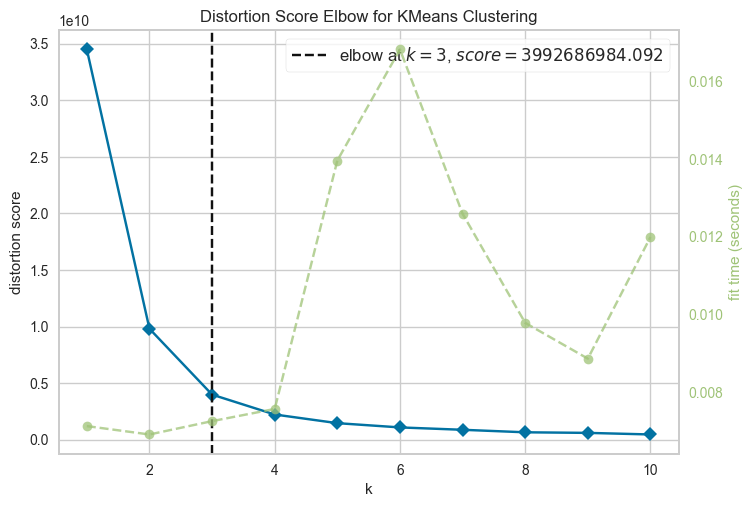

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(X)

visualizer.show()

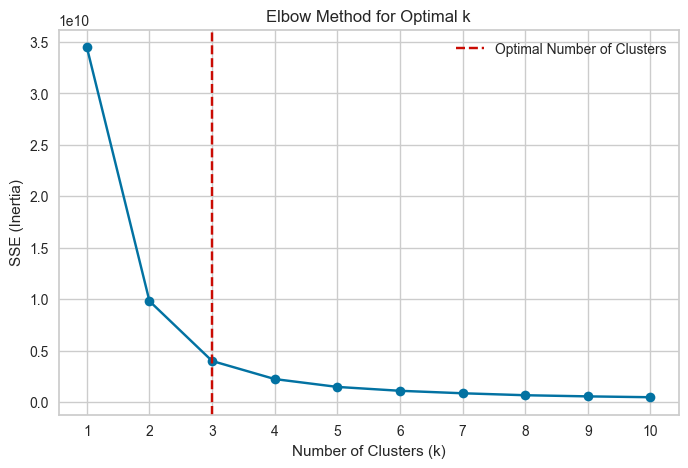

In [27]:
k_values = range(1, 11)  
sse = [] 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

features = X 
selector = SelectKBest(score_func=mutual_info_classif, k=2) 
X_selected = selector.fit_transform(features, kmeans.labels_)

print("\nFeature Selection Results")
print("Jumlah fitur sebelum seleksi:", features.shape[1])
print("Jumlah fitur setelah seleksi:", X_selected.shape[1])

selected_features = features.columns[selector.get_support()]
print("Fitur terpilih setelah feature selection:", selected_features)

print("\nKMeans Clustering (Setelah Feature Selection)")
kmeans_fs = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_fs.fit(X_selected)


Feature Selection Results
Jumlah fitur sebelum seleksi: 5
Jumlah fitur setelah seleksi: 2
Fitur terpilih setelah feature selection: Index(['CustomerAge', 'AccountBalance'], dtype='object')

KMeans Clustering (Setelah Feature Selection)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [29]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels_selected = kmeans.fit_predict(X_selected)

silhouette_selected = silhouette_score(X_selected, kmeans_labels_selected)

clustering_scores_selected = pd.DataFrame({
    'Clustering Method': ['K-Means (Selected Features)'],
    'Silhouette Score': [silhouette_selected],
})
clustering_scores_selected

,Clustering Method,Silhouette Score
0,K-Means (Selected Features),0.640674


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

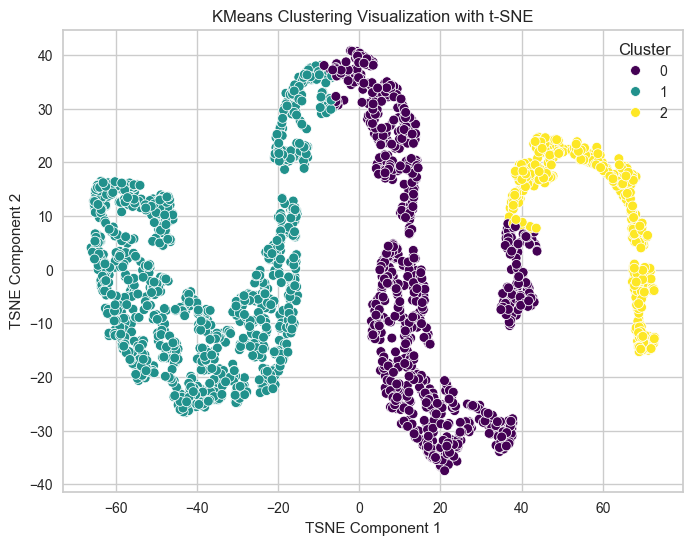

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Reduce to 2D using TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Scatter plot of TSNE results with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_, palette="viridis", s=50)
plt.title("KMeans Clustering Visualization with t-SNE")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend(title="Cluster")
plt.show()

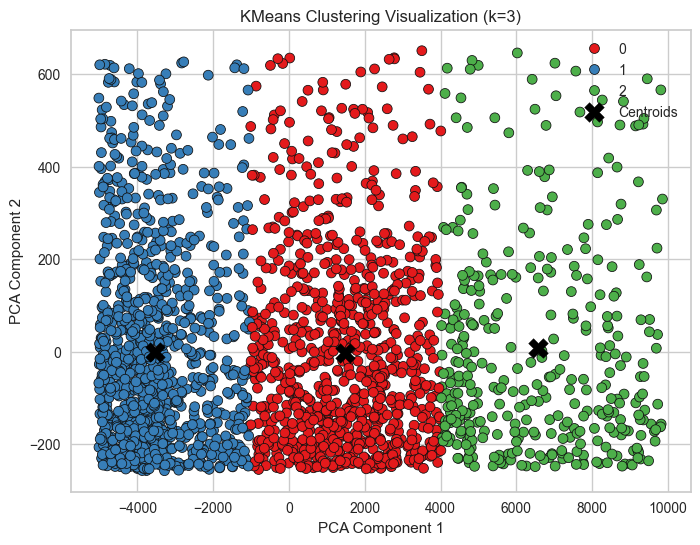

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

optimal_k = 3 
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_pca)

df_processed['Cluster_KMeans_Optimal'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set1", s=50, edgecolor="k")

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="black", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"KMeans Clustering Visualization (k={optimal_k})")
plt.legend()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col]) 
    label_encoders[col] = le 

for col in categorical_columns:
    df_processed[col + '_Inverse'] = label_encoders[col].inverse_transform(df_processed[col + '_Encoded']) 

df_processed.head(10)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,...,Location_Encoded,Channel_Encoded,CustomerOccupation_Encoded,Cluster_KMeans,Cluster_KMeans_PCA,Cluster_KMeans_Optimal,TransactionType_Inverse,Location_Inverse,Channel_Inverse,CustomerOccupation_Inverse
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,...,36,0,0,0,0,0,Debit,San Diego,ATM,Doctor
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68,Doctor,141,1,13758.91,...,15,0,0,2,2,2,Debit,Houston,ATM,Doctor
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19,Student,56,1,1122.35,...,23,2,3,1,1,1,Debit,Mesa,Online,Student
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26,Student,25,1,8569.06,...,33,2,3,0,0,0,Debit,Raleigh,Online,Student
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,26,Student,198,1,7429.40,...,1,2,3,0,0,0,Credit,Atlanta,Online,Student
5,92.15,2024-11-04 08:06:36,Debit,Oklahoma City,ATM,18,Student,172,1,781.68,...,28,0,3,1,1,1,Debit,Oklahoma City,ATM,Student
6,7.08,2024-11-04 08:10:09,Credit,Seattle,ATM,37,Doctor,139,1,13316.71,...,39,0,0,2,2,2,Credit,Seattle,ATM,Doctor
7,171.42,2024-11-04 08:10:55,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24,...,16,1,2,1,1,1,Credit,Indianapolis,Branch,Retired
8,106.23,2024-11-04 08:11:14,Credit,Detroit,Branch,51,Engineer,86,1,9095.14,...,11,1,1,0,0,0,Credit,Detroit,Branch,Engineer
9,815.96,2024-11-04 08:06:32,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,...,26,0,0,1,1,1,Debit,Nashville,ATM,Doctor


Hasil inverse

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

=== Statistik Deskriptif Tiap Cluster ===
        TransactionAmount                                                  \
                    count        mean         std   min      25%      50%   
Cluster                                                                     
0                   875.0  252.430137  211.886450  0.32  78.8450  202.490   
1                  1041.0  257.450528  219.475869  0.26  76.1600  199.020   
2                   366.0  257.450929  227.242044  1.14  79.4375  182.435   

                         CustomerAge             ... Cluster_KMeans_PCA       \
             75%     max       count       mean  ...                75%  max   
Cluster                                          ...                           
0        371.580  903.19       875.0  51.565714  ...                0.0  0.0   
1        374.610  883.92      1041.0  37.864553  ...                1.0  1.0   
2        387.145  896.79       366.0  47.620219  ...                2.0  2.0   

        Cluste

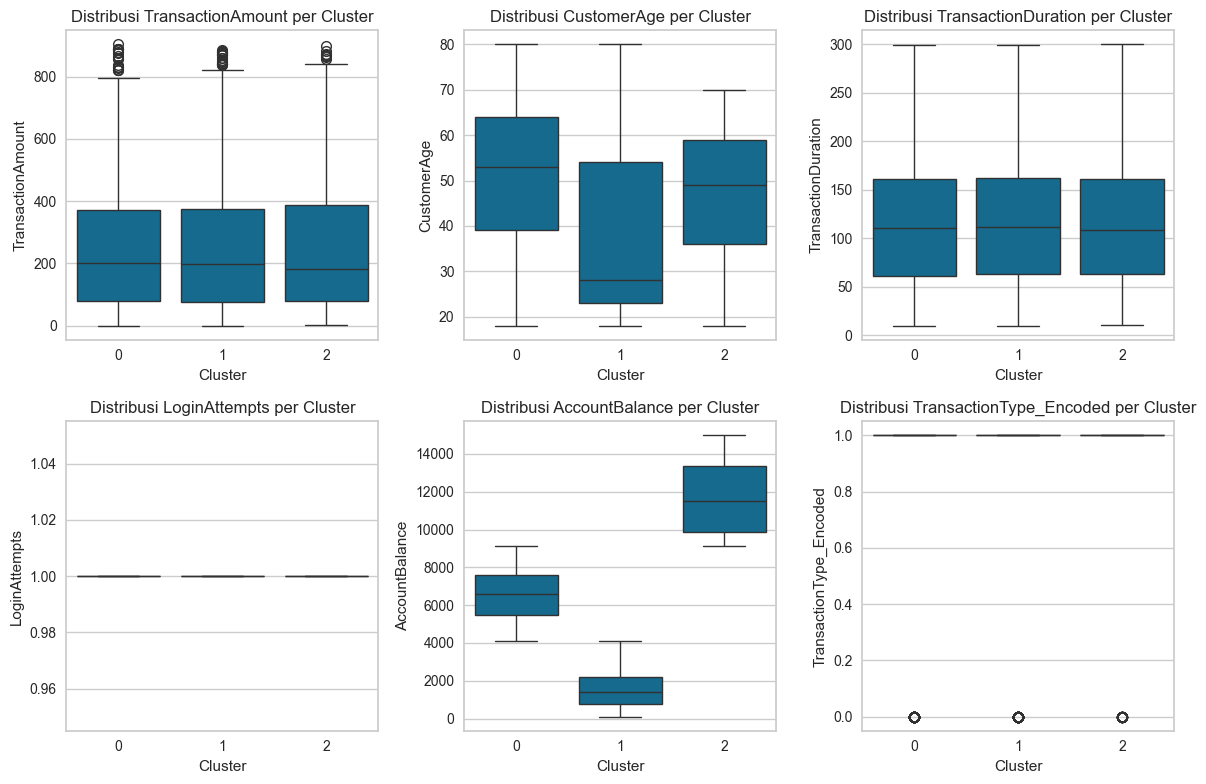

In [33]:
# Pastikan dataset memiliki kolom 'Cluster'
if 'Cluster' not in df_processed.columns:
    df_processed['Cluster'] = kmeans.labels_  # Jika belum ditambahkan

# 🔹 1. Statistik Deskriptif per Cluster
print("=== Statistik Deskriptif Tiap Cluster ===")
cluster_summary = df_processed.groupby('Cluster').describe()
print(cluster_summary)

# 🔹 2. Visualisasi Distribusi Fitur dalam Setiap Cluster
numerical_features = df_processed.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Cluster')  # Hapus kolom cluster agar tidak mengganggu

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features[:6]):  # Batasi ke 6 fitur pertama
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_processed['Cluster'], y=df_processed[feature])
    plt.title(f"Distribusi {feature} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



In [34]:
df_processed['Cluster'].value_counts()


Cluster
1    1041
0     875
2     366
Name: count, dtype: int64


=== Statistik Deskriptif Tiap Cluster ===
               TransactionAmount                                       \
                           count        mean         std   min    25%   
Cluster_KMeans                                                          
0                          873.0  252.128958  211.389091  0.32  78.92   
1                         1041.0  257.450528  219.475869  0.26  76.16   
2                          368.0  258.138125  228.242532  1.14  79.23   

                                         CustomerAge             ...  \
                    50%      75%     max       count       mean  ...   
Cluster_KMeans                                                   ...   
0               202.490  369.890  903.19       873.0  51.560137  ...   
1               199.020  374.610  883.92      1041.0  37.864553  ...   
2               182.435  388.565  896.79       368.0  47.654891  ...   

               Cluster_KMeans_Optimal      Cluster                          \
       

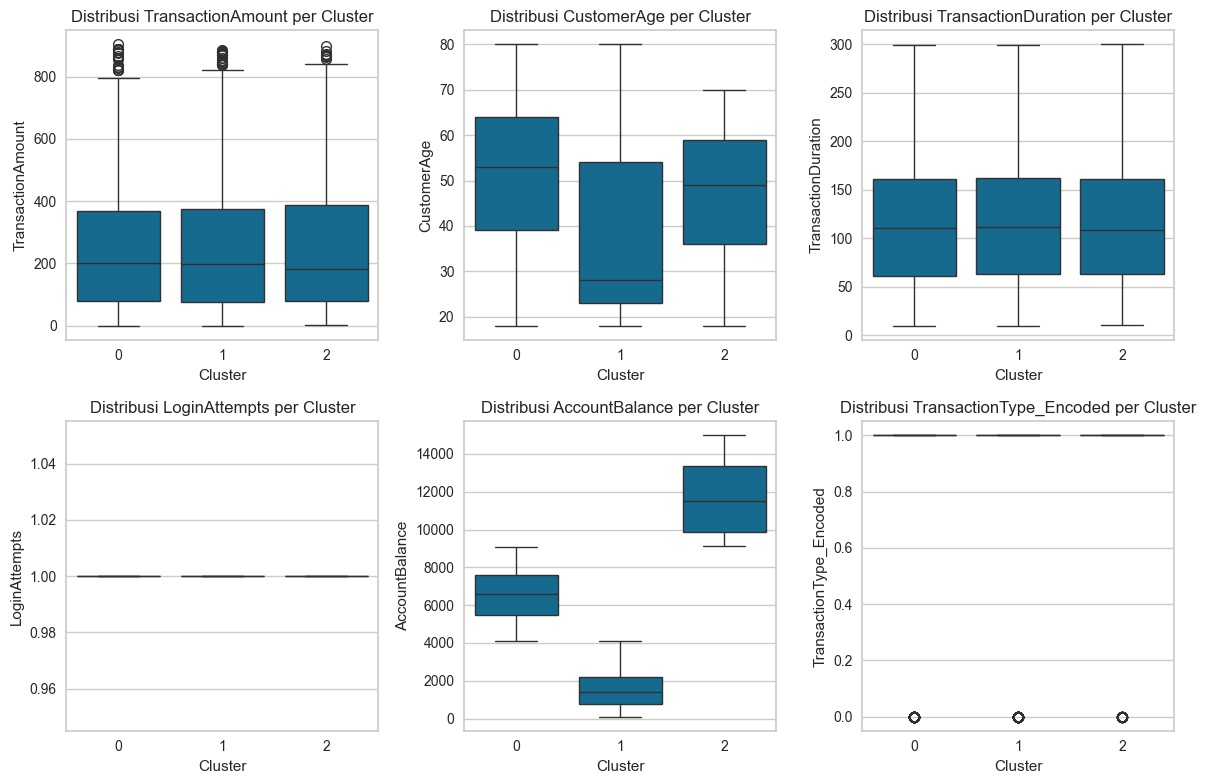

In [35]:
print("\n=== Statistik Deskriptif Tiap Cluster ===")
cluster_summary = df_processed.groupby('Cluster_KMeans').describe()
print(cluster_summary)

# 🔹 Visualisasi Distribusi Fitur dalam Setiap Cluster
numerical_features = df_processed.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Cluster_KMeans')  # Hapus kolom cluster agar tidak mengganggu

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features[:6]):  # Batasi ke 6 fitur pertama
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_processed['Cluster_KMeans'], y=df_processed[feature])
    plt.title(f"Distribusi {feature} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Customer Age:** 51,57 tahun
- **Rata-rata Transaction Amount:** 252,43
- **Rata-rata AccountBalance:** $6,577.49
- **Rata-rata Login Attemps:** 1
- **Analisis:** Cluster ini terdiri dari pelanggan yang lebih senior dengan rata-rata usia tertinggi dibandingkan cluster lainnya. Mereka memiliki saldo rekening yang cukup tinggi dan cenderung melakukan transaksi dalam jumlah sedang. Stabilitas finansial mereka menunjukkan bahwa mereka adalah pengguna setia yang sudah mapan dalam pengelolaan keuangan. Karena mereka lebih berhati-hati dalam pengeluaran dan cenderung mencari keuntungan jangka panjang, mereka merupakan target yang ideal untuk produk investasi seperti deposito, obligasi, atau program pensiun. 

## Cluster 1:
- **Rata-rata Customer Age:** 37,86 tahun  
- **Rata-rata Transaction Amount:** 257,45
- **Rata-rata AccountBalance:** $1.592,65
- **Rata-rata Login Attemps:** 1
- **Analisis:** Cluster ini didominasi oleh pelanggan yang lebih muda dengan saldo rekening yang relatif rendah. Meskipun pemasukan mereka tidak sebesar cluster lain, mereka tetap memiliki daya beli dan cukup aktif dalam melakukan transaksi. Hal ini menunjukkan bahwa mereka adalah segmen yang dinamis dan responsif terhadap berbagai penawaran. Oleh karena itu, strategi yang cocok untuk mereka adalah promosi diskon, program cashback, atau skema cicilan untuk meningkatkan loyalitas mereka serta mendorong peningkatan transaksi.

## Cluster 2:
- **Rata-rata Customer Age:** 47,62 tahun  
- **Rata-rata Transaction Amount:** 257,45
- **Rata-rata AccountBalance:** $11.665,45
- **Rata-rata Login Attemps:** 1
- **Analisis:** Cluster ini berisi pelanggan dengan usia menengah yang memiliki daya beli tertinggi di antara semua kelompok. Mereka memiliki saldo rekening yang besar dan cenderung melakukan transaksi dalam jumlah yang tinggi. Berdasarkan karakteristik ini, mereka kemungkinan besar terdiri dari pengusaha atau pekerja dengan penghasilan tinggi. Dengan tingginya kapasitas belanja mereka, strategi bisnis yang optimal adalah menawarkan layanan eksklusif seperti VIP membership, produk mewah, serta program loyalitas premium yang memberikan pengalaman eksklusif bagi mereka.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Customer Age:** 51,56 tahun
- **Rata-rata Transaction Amount:** 252,13
- **Analisis:** Cluster 0 berisi pelanggan yang lebih senior dengan transaksi dalam jumlah sedang. Mereka memiliki stabilitas finansial yang baik dan melakukan transaksi secara konsisten. Kemungkinan besar mereka adalah pelanggan tetap yang memiliki kebiasaan belanja rutin. Pelanggan dalam cluster ini dapat ditargetkan dengan produk investasi jangka panjang, program loyalitas, atau layanan khusus untuk pelanggan tetap.

## Cluster 1:
- **Rata-rata Customer Age:** 37,86 tahun  
- **Rata-rata Transaction Amount:** 257,45
- **Analisis:** Cluster 1 didominasi oleh pelanggan dengan usia lebih muda. Mereka memiliki saldo akun yang relatif rendah tetapi menunjukkan aktivitas transaksi yang cukup aktif. Kemungkinan besar mereka adalah pelanggan dari kalangan profesional muda atau mahasiswa yang memiliki daya beli terbatas namun sering bertransaksi. Pelanggan dalam cluster ini cocok untuk promosi diskon, cashback, atau program reward yang dapat mendorong mereka untuk tetap berbelanja secara rutin.

## Cluster 2:
- **Rata-rata Customer Age:** 47,65 tahun  
- **Rata-rata Transaction Amount:** 258,14
- **Analisis:** Cluster 2 berisi pelanggan dengan usia menengah yang memiliki pengeluaran tinggi. Mereka sering melakukan transaksi dalam jumlah besar, yang menunjukkan bahwa mereka memiliki daya beli yang kuat. Berdasarkan pola ini, mereka mungkin merupakan pengusaha atau profesional dengan pendapatan tinggi. Pelanggan ini cocok untuk ditargetkan dengan layanan VIP, produk eksklusif, dan promosi yang terkait dengan barang mewah atau premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:

df_processed['Cluster'] = kmeans.labels_

df_processed.to_csv("hasil_clustering.csv", index=False)

print("\n✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering.csv")


✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering.csv


In [37]:
pd.read_csv('hasil_clustering.csv')

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,...,Channel_Encoded,CustomerOccupation_Encoded,Cluster_KMeans,Cluster_KMeans_PCA,Cluster_KMeans_Optimal,TransactionType_Inverse,Location_Inverse,Channel_Inverse,CustomerOccupation_Inverse,Cluster
0,14.09,2024-11-04 08:08:08,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,...,0,0,0,0,0,Debit,San Diego,ATM,Doctor,0
1,376.24,2024-11-04 08:09:35,Debit,Houston,ATM,68,Doctor,141,1,13758.91,...,0,0,2,2,2,Debit,Houston,ATM,Doctor,2
2,126.29,2024-11-04 08:07:04,Debit,Mesa,Online,19,Student,56,1,1122.35,...,2,3,1,1,1,Debit,Mesa,Online,Student,1
3,184.50,2024-11-04 08:09:06,Debit,Raleigh,Online,26,Student,25,1,8569.06,...,2,3,0,0,0,Debit,Raleigh,Online,Student,0
4,13.45,2024-11-04 08:06:39,Credit,Atlanta,Online,26,Student,198,1,7429.40,...,2,3,0,0,0,Credit,Atlanta,Online,Student,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,856.21,2024-11-04 08:11:29,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79,...,1,0,2,2,2,Credit,Colorado Springs,Branch,Doctor,2
2278,251.54,2024-11-04 08:11:42,Debit,Tucson,Branch,48,Doctor,177,1,254.75,...,1,0,1,1,1,Debit,Tucson,Branch,Doctor,1
2279,28.63,2024-11-04 08:08:39,Debit,San Diego,Branch,56,Retired,146,1,3382.91,...,1,2,1,1,1,Debit,San Diego,Branch,Retired,1
2280,185.97,2024-11-04 08:12:22,Debit,Denver,Online,23,Student,19,1,1776.91,...,2,3,1,1,1,Debit,Denver,Online,Student,1
